### Libraries and Dataset

To perform the analysis, we need three libraries: **Pandas**, **Matplotlib**, and **Seaborn**. We will focus on the `appearances.csv` dataset.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_appearance = pd.read_csv("appearances.csv")


### Filtering Data

Our analysis focuses on the **2023-2024 season** and Europe’s **Big Five Leagues**.

In [2]:
list_big_five_championship = ['FR1', 'ES1', 'IT1', 'GB1', 'L1']
start_season = '2023-08-01'
end_season = '2024-07-01'

df_appearance["date"] = pd.to_datetime(df_appearance["date"])
df_appearance_big_five_championship = df_appearance[
    df_appearance['competition_id'].isin(list_big_five_championship) &
    (df_appearance["date"] >= start_season) &
    (df_appearance["date"] <= end_season)
]


### Player Statistics

We’ll group the data by player and calculate key stats like goals, assists, and minutes played.

In [3]:
df_players_stats_big_five = (
    df_appearance_big_five_championship
    .groupby("player_id")
    .agg({
        "goals": "sum",
        "assists": "sum",
        "minutes_played": "sum",
        "competition_id": "first",
        "player_name": "first",
        "player_club_id": "first",
    })
)

# Calculate per-90-minute stats
df_players_stats_big_five["assists_per_90min"] = (df_players_stats_big_five["assists"] / df_players_stats_big_five["minutes_played"]) * 90
df_players_stats_big_five["goals_per_90min"] = (df_players_stats_big_five["goals"] / df_players_stats_big_five["minutes_played"]) * 90


In [4]:
df_players_stats_big_five.head(5)

,goals,assists,minutes_played,competition_id,player_name,player_club_id,assists_per_90min,goals_per_90min
player_id,,,,,,,,
3333,0,2,778,GB1,James Milner,1237,0.231362,0.000000
7161,5,10,2216,L1,Jonas Hofmann,15,0.406137,0.203069
7825,0,0,180,ES1,Pepe Reina,1050,0.000000,0.000000
12282,1,2,2972,ES1,Daley Blind,12321,0.060565,0.030283
12907,0,0,270,IT1,Alessio Cragno,6574,0.000000,0.000000


### Visualization

We’ll visualize the top 10 goalscorers using Seaborn’s barplot:

C:\Users\Florian\AppData\Local\Temp\ipykernel_11668\2910872368.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


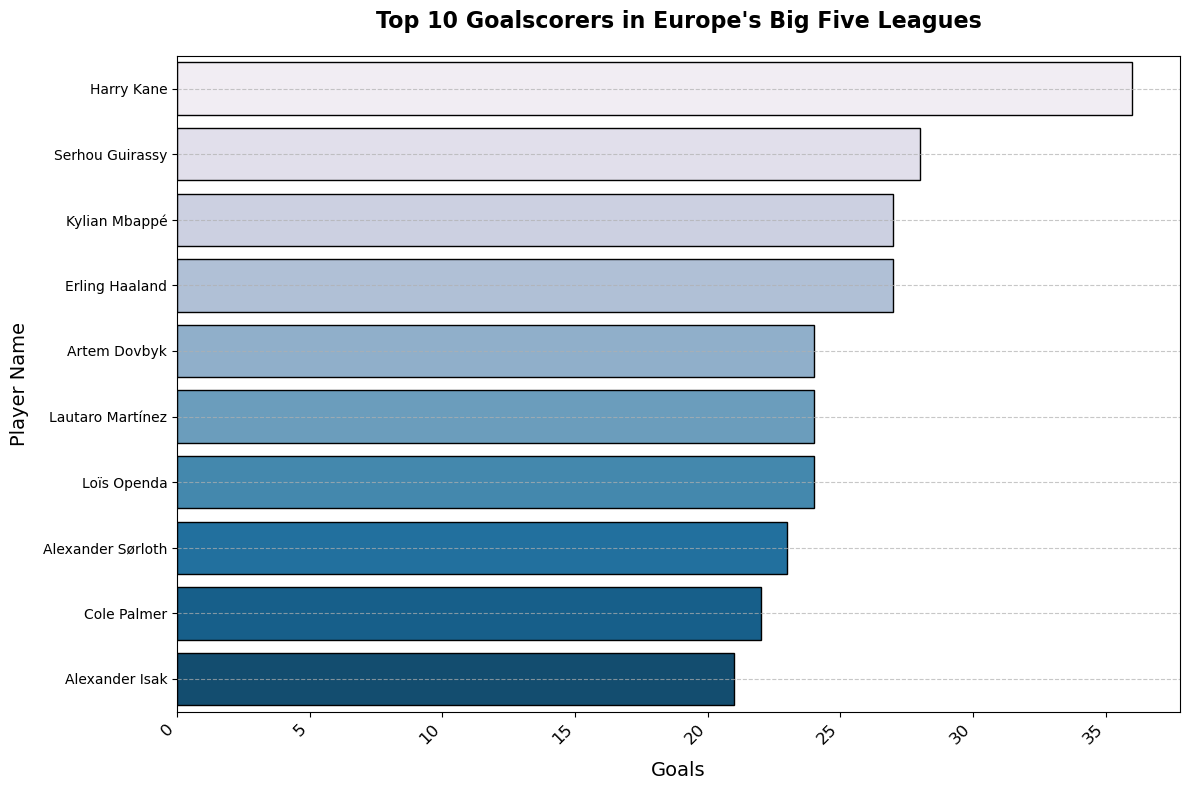

In [5]:
# Top 10 goalscorers
df_ranking_top_10 = df_players_stats_big_five.sort_values(by="goals", ascending=False).head(10)

palette = sns.color_palette("PuBu", len(df_ranking_top_10))

plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_ranking_top_10,
    x="goals",
    y="player_name",
    palette=palette,
    edgecolor="black"
)

plt.xticks(rotation=45, fontsize=12, ha='right')
plt.xlabel("Goals", fontsize=14, labelpad=10)
plt.ylabel("Player Name", fontsize=14, labelpad=10)
plt.title("Top 10 Goalscorers in Europe's Big Five Leagues", fontsize=16, weight="bold", pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


For the top assist providers of the season, we will use another type of visualization, still relying on Seaborn

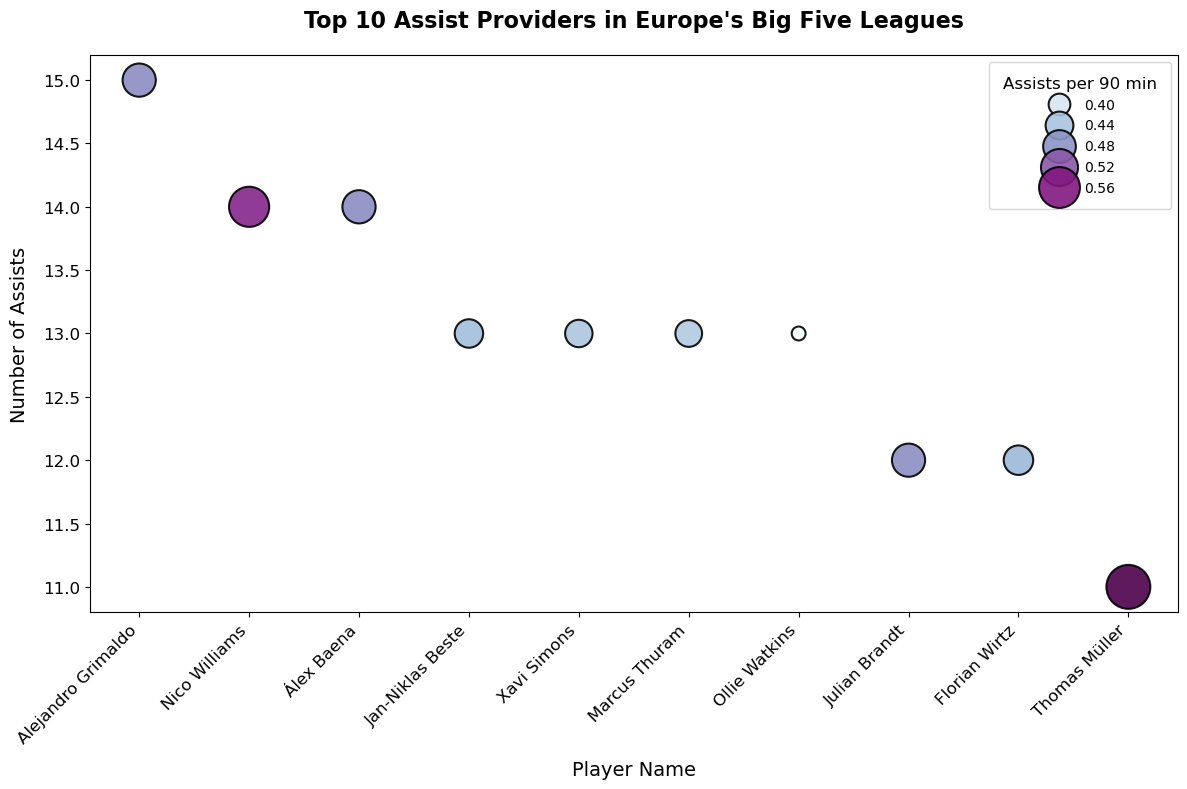

In [6]:
# Top 10 assist providers
df_ranking_top_10 = df_players_stats_big_five.sort_values(by=["assists","assists_per_90min"], ascending=False).head(10)

plt.figure(figsize=(12, 8))

palette = sns.color_palette("BuPu", as_cmap=True)

sns.scatterplot(
    data=df_ranking_top_10,
    y="assists",
    x="player_name",
    size="assists_per_90min",
    sizes=(100, 1000),
    alpha=0.9,
    hue="assists_per_90min",
    palette=palette,
    edgecolor="black"
)

plt.legend(
    title="Assists per 90 min",
    title_fontsize=12,
    fontsize=10,
    loc="upper right",
    borderpad=1
)

plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.xlabel("Player Name", fontsize=14, labelpad=10)
plt.ylabel("Number of Assists", fontsize=14, labelpad=10)
plt.title("Top 10 Assist Providers in Europe's Big Five Leagues", fontsize=16, weight="bold", pad=20)
plt.tight_layout()
plt.show()


Please note that TransferMarkt counts penalties won as an assist if the penalty is successfully converted. As a result, the figures above may differ from the official statistics.

Below, I have included the official results for your reference.

|  | Name Player | Assist |
| --- | --- | --- |
| 1 | Alex Baena • Villarreal | 14 |
| 2 | Ollie Watkins • Aston Villa | 13 |
| 3 | Álex Grimaldo • Leverkusen | 13 |
| 4 | Leroy Sané • Bayern Munich | 11 |
| 5 | Jan-Niklas Beste • Heidenheim | 11 |
| 6 | Julian Brandt • Dortmund | 11 |
| 7 | Nico Williams • Athletic Club | 11 |
| 8 | Xavi Simons • RB Leipzig | 11 |
| 9 | Cole Paler  | 11 |
| 10 | Florian Wirtz • Leverkusen | 11 |